<a href="https://colab.research.google.com/github/04bhavyaa/computer_vision/blob/main/sobel_filters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
"""
Use sobel filter to identify edges of the images
Task 1: Apply sobel filter to determine gradients using sobel filter of size 3*3
Task 2: Determine magnitude and angle of each edge point
Task 3: Show magnitude of edge pixels
Task 4: Plot histogram of angles and identify angles with maximum frequency
Task 5: Increase the size of Sobel filter and observe the effect
Task 6: Repeat the above steps for any other image
"""

'\nUse sobel filter to identify edges of the images\nTask 1: Apply sobel filter to determine gradients using sobel filter of size 3*3\nTask 2: Determine magnitude and angle of each edge point\nTask 3: Show magnitude of edge pixels\nTask 4: Plot histogram of angles and identify angles with maximum frequency\nTask 5: Increase the size of Sobel filter and observe the effect\nTask 6: Repeat the above steps for any other image\n'

## Sobel Filter

The **Sobel Filter** is an edge detection operator used in image processing and computer vision. It works by calculating the **gradient of image intensity** at each pixel, highlighting regions of **high spatial frequency** that correspond to edges.

The filter uses two **3 by 3 convolution kernels**:
- **Sobel X**: Detects changes in the **horizontal** direction.
- **Sobel Y**: Detects changes in the **vertical** direction.

By combining these two kernels, we can determine both the **magnitude** and **direction** of edges in an image.

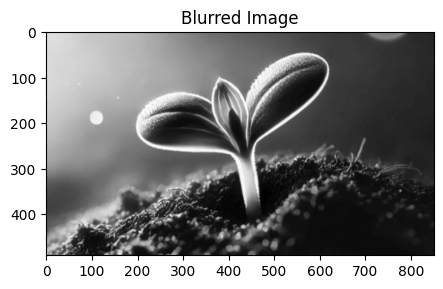

In [22]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = "photo2.png"
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Implement gaussian blurring
blurred_image = cv2.GaussianBlur(image, (3, 3), 0)

plt.figure(figsize=(5, 5))
plt.imshow(blurred_image, cmap='gray')
plt.title('Blurred Image')
plt.show()

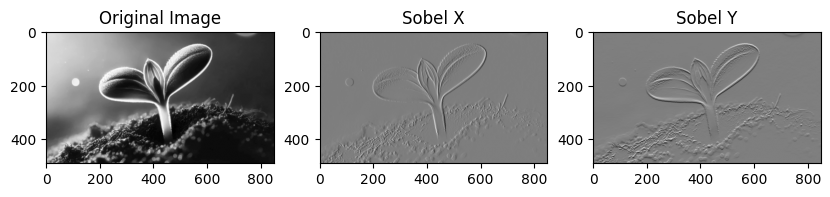

In [23]:
# Apply Sobel filter in x and y directions
sobelx = cv2.Sobel(blurred_image, cv2.CV_64F, 1, 0, ksize=3)
sobely = cv2.Sobel(blurred_image, cv2.CV_64F, 0, 1, ksize=3)

# Display the original and filtered images
plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
plt.imshow(blurred_image, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 3, 2)
plt.imshow(sobelx, cmap='gray')
plt.title('Sobel X')

plt.subplot(1, 3, 3)
plt.imshow(sobely, cmap='gray')
plt.title('Sobel Y')

plt.show()

[[  0.           4.           4.         ...   0.           0.
    0.        ]
 [  0.           4.           4.         ...   0.           0.
    0.        ]
 [  0.           4.           4.         ...   0.           0.
    0.        ]
 ...
 [ 40.          59.07622195 108.07404869 ...   0.           0.
    0.        ]
 [ 60.          87.20091743 134.71451295 ...   0.           0.
    0.        ]
 [  0.          62.         110.         ...   0.           0.
    0.        ]]


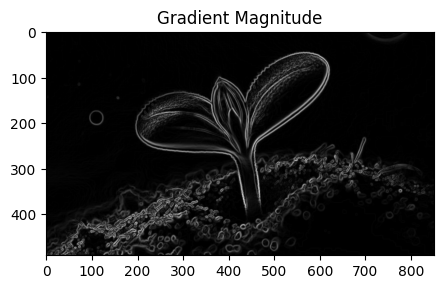

In [24]:
# Calculate the gradient magnitude
gradient_magnitude = np.sqrt(sobelx**2 + sobely**2)
print(gradient_magnitude)

# Display the gradient magnitude
plt.figure(figsize=(5, 5))
plt.imshow(gradient_magnitude, cmap='gray')
plt.title('Gradient Magnitude')
plt.show()

[[   0.          180.          180.         ...    0.
     0.            0.        ]
 [   0.          180.          180.         ...    0.
     0.            0.        ]
 [   0.          180.          180.         ...    0.
     0.            0.        ]
 ...
 [ -90.         -123.95905982 -141.00900596 ...    0.
     0.            0.        ]
 [ -90.         -126.60707481 -139.21417852 ...    0.
     0.            0.        ]
 [   0.          180.          180.         ...    0.
     0.            0.        ]]


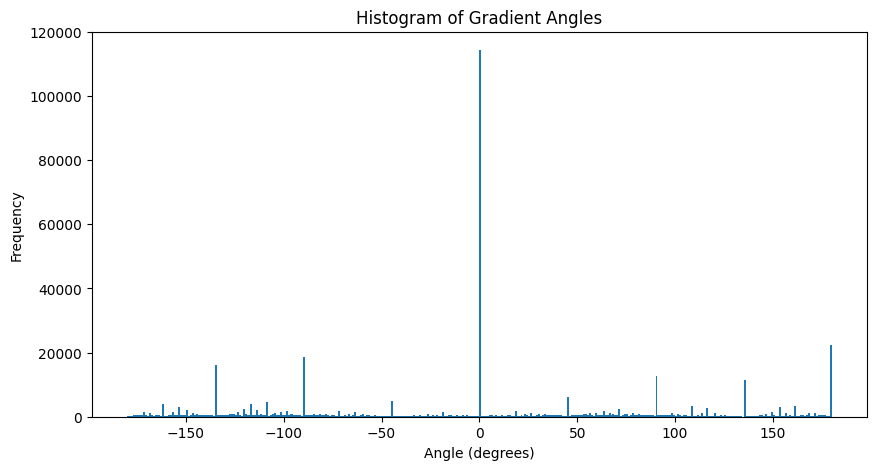

In [25]:
# Calculate the gradient angle
gradient_angle = np.arctan2(sobely, sobelx) * 180 / np.pi
print(gradient_angle)

# Plot the histogram of angles
plt.figure(figsize=(10, 5))
plt.hist(gradient_angle.ravel(), bins=360, range=(-180, 180))
plt.title('Histogram of Gradient Angles')
plt.xlabel('Angle (degrees)')
plt.ylabel('Frequency')
plt.show()

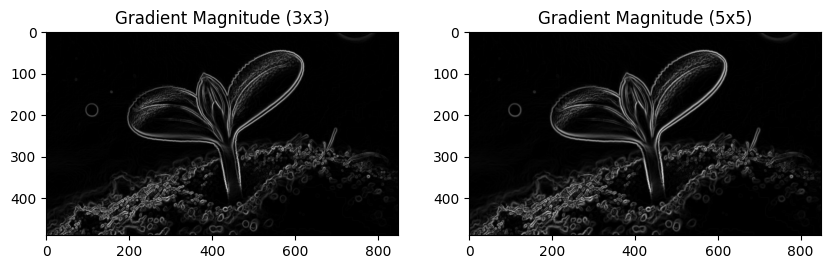

In [26]:
# Apply Sobel filter with a 5x5 kernel
sobelx_5 = cv2.Sobel(blurred_image, cv2.CV_64F, 1, 0, ksize=5)
sobely_5 = cv2.Sobel(blurred_image, cv2.CV_64F, 0, 1, ksize=5)

# Calculate the gradient magnitude
gradient_magnitude_5 = np.sqrt(sobelx_5**2 + sobely_5**2)

# Display the gradient magnitude
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(gradient_magnitude, cmap='gray')
plt.title('Gradient Magnitude (3x3)')

plt.subplot(1, 2, 2)
plt.imshow(gradient_magnitude_5, cmap='gray')
plt.title('Gradient Magnitude (5x5)')

plt.show()